#### 머신러닝, 딥러닝 회귀 분류

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

# 1. 데이터 읽기

In [28]:
df = pd.read_csv('C:/Users/USER/Desktop/Deep_Learning/abalone.csv')
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [33]:
df.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [35]:
df.isnull().values.any()

False

In [37]:
# 분류
input_cls = df.drop(['id','Sex'],axis=1).values
target_cls = df['Sex']

# 회귀
input_rg = df.drop(['id','Rings'],axis=1)
input_rg = pd.get_dummies(input_rg,columns=['Sex']).values
target_rg = df['Rings']

In [39]:
input_cls

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [41]:
input_rg

array([[0.455, 0.365, 0.095, ..., False, False, True],
       [0.35, 0.265, 0.09, ..., False, False, True],
       [0.53, 0.42, 0.135, ..., True, False, False],
       ...,
       [0.6, 0.475, 0.205, ..., False, False, True],
       [0.625, 0.485, 0.15, ..., True, False, False],
       [0.71, 0.555, 0.195, ..., False, False, True]], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_cls = le.fit_transform(target_cls)
target_cls

array([2, 2, 0, ..., 2, 0, 2])

In [45]:
# split test and train set

x_train_cls,x_test_cls,y_train_cls,y_test_cls = train_test_split(input_cls,target_cls,test_size=0.2,shuffle=True,random_state=12)

# split test and train set

x_train_rg,x_test_rg,y_train_rg,y_test_rg = train_test_split(input_rg,target_rg,test_size=0.2,shuffle=True,random_state=12)

In [47]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train_cls=ss.fit_transform(x_train_cls)
x_test_cls=ss.transform(x_test_cls)

In [49]:
ss_r=StandardScaler()
x_train_rg=ss_r.fit_transform(x_train_rg)
x_test_rg=ss_r.transform(x_test_rg)

# 머신러닝

In [53]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [55]:
# 분류 
lr=LogisticRegression(C=10,max_iter=500)
lr.fit(x_train_cls,y_train_cls)
y_pred=lr.predict(x_test_cls)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test_cls, y_pred))
print (confusion_matrix(y_test_cls, y_pred))

# 회귀
lr_r=LinearRegression()
lr_r.fit(x_train_rg,y_train_rg)
y_pred_lr=lr_r.predict(x_test_rg)
lr_r_mse =mean_squared_error(y_test_rg,y_pred_lr)
print ("\n--- Linear Regression  ---")
print(lr_r_mse)


--- Logistic Regression Classifier ---
0.5550239234449761
[[ 70  37 171]
 [ 13 240  28]
 [ 55  68 154]]

--- Linear Regression  ---
4.589446212759856


In [57]:
# 분류 
dtc=DecisionTreeClassifier()
dtc.fit(x_train_cls,y_train_cls)
y_pred_dtc=dtc.predict(x_test_cls)
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test_cls, y_pred_dtc))
print (confusion_matrix(y_test_cls, y_pred_dtc))

# 회귀
dtr=DecisionTreeRegressor()
dtr.fit(x_train_rg,y_train_rg)
y_pred_dtr=dtr.predict(x_test_rg)
dtr_mse =mean_squared_error(y_test_rg,y_pred_dtr)
print ("\n--- Decision Tree Regression  ---")
print(dtr_mse)


--- Decision Tree Classifier ---
0.4796650717703349
[[103  41 134]
 [ 39 179  63]
 [102  56 119]]

--- Decision Tree Regression  ---
8.802631578947368


In [59]:
# 분류 
rfc=RandomForestClassifier()
rfc.fit(x_train_cls,y_train_cls)
y_pred_rfc=rfc.predict(x_test_cls)
print ("\n--- RandomForest Classifier ---")
print (accuracy_score(y_test_cls, y_pred_rfc))
print (confusion_matrix(y_test_cls, y_pred_rfc))

# 회귀
rfr=RandomForestRegressor()
rfr.fit(x_train_rg,y_train_rg)
y_pred_rfr=rfr.predict(x_test_rg)
rfr_mse =mean_squared_error(y_test_rg,y_pred_rfr)
print ("\n--- RandomForest Regression  ---")
print(rfr_mse)


--- RandomForest Classifier ---
0.5645933014354066
[[104  25 149]
 [ 20 217  44]
 [ 83  43 151]]

--- RandomForest Regression  ---
4.508092703349283


In [61]:
# 분류 
SVC=SVC()
SVC.fit(x_train_cls,y_train_cls)
y_pred_SVC=SVC.predict(x_test_cls)
print ("\n--- SVC Classifier ---")
print (accuracy_score(y_test_cls, y_pred_SVC))
print (confusion_matrix(y_test_cls, y_pred_SVC))

# 회귀
SVR=SVR()
SVR.fit(x_train_rg,y_train_rg)
y_pred_SVR=SVR.predict(x_test_rg)
SVR_mse =mean_squared_error(y_test_rg,y_pred_SVR)
print ("\n--- SVR Regression  ---")
print(SVR_mse)


--- SVC Classifier ---
0.5382775119617225
[[ 38  28 212]
 [  1 230  50]
 [ 31  64 182]]

--- SVR Regression  ---
4.581737570172711


In [63]:
# 분류 
knc=KNeighborsClassifier()
knc.fit(x_train_cls,y_train_cls)
y_pred_knc=knc.predict(x_test_cls)
print ("\n--- KNeighbor Classifier ---")
print (accuracy_score(y_test_cls, y_pred_knc))
print (confusion_matrix(y_test_cls, y_pred_knc))

# 회귀
knr=KNeighborsRegressor()
knr.fit(x_train_rg,y_train_rg)
y_pred_knr=rfr.predict(x_test_rg)
knr_mse =mean_squared_error(y_test_rg,y_pred_knr)
print ("\n--- KNeighbor Regression  ---")
print(knr_mse)


--- KNeighbor Classifier ---
0.55622009569378
[[122  35 121]
 [ 36 215  30]
 [101  48 128]]

--- KNeighbor Regression  ---
4.508092703349283


In [65]:
!pip install tensorflow

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
def create_dense_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))  # 이진 분류일 경우

    model.add(Dense(3, activation='softmax'))  # 다중 분류일 경우

    # model.add(Dense(1))  # 회귀일 경우

    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # 다중 분류일 경우(target을 원 핫 인코딩 한 경우)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 다중 분류일 경우(target을 라벨 인코딩 한 경우)

    # model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])  # 회귀일 경우
    return model

# 분류
input_dim = x_train_cls.shape[1]
model = create_dense_model((input_dim,))
model.summary()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,755 (10.76 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
y_train_cls

array([1, 0, 2, ..., 0, 2, 2])

In [73]:
from tensorflow.keras.utils import to_categorical

# categorical_crossentropy 사용가능
y_train_one = to_categorical(y_train_cls)
y_train_one.shape

(3341, 3)

In [75]:
# !pip install tensorflow-cpu

In [77]:
history = model.fit(x_train_cls,y_train_cls,epochs=20,batch_size=16,validation_data=(x_test_cls,y_test_cls))

Epoch 1/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5205 - loss: 0.9330 - val_accuracy: 0.5490 - val_loss: 0.8473
Epoch 2/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5549 - loss: 0.8525 - val_accuracy: 0.5467 - val_loss: 0.8285
Epoch 3/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5560 - loss: 0.8619 - val_accuracy: 0.5502 - val_loss: 0.8306
Epoch 4/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5586 - loss: 0.8477 - val_accuracy: 0.5478 - val_loss: 0.8257
Epoch 5/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5703 - loss: 0.8286 - val_accuracy: 0.5383 - val_loss: 0.8341
Epoch 6/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5756 - loss: 0.8223 - val_accuracy: 0.5502 - val_loss: 0.8358
Epoch 7/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5616 - loss: 0.8474 - val_accuracy: 0.5467 - val_loss: 0.8351
Epoch 8/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5760 - loss: 0.8396 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

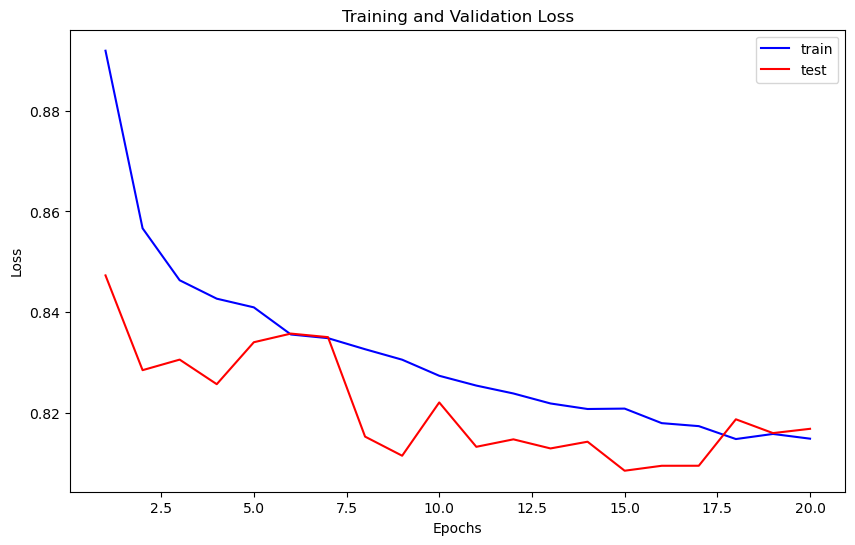

In [78]:
# 손실 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

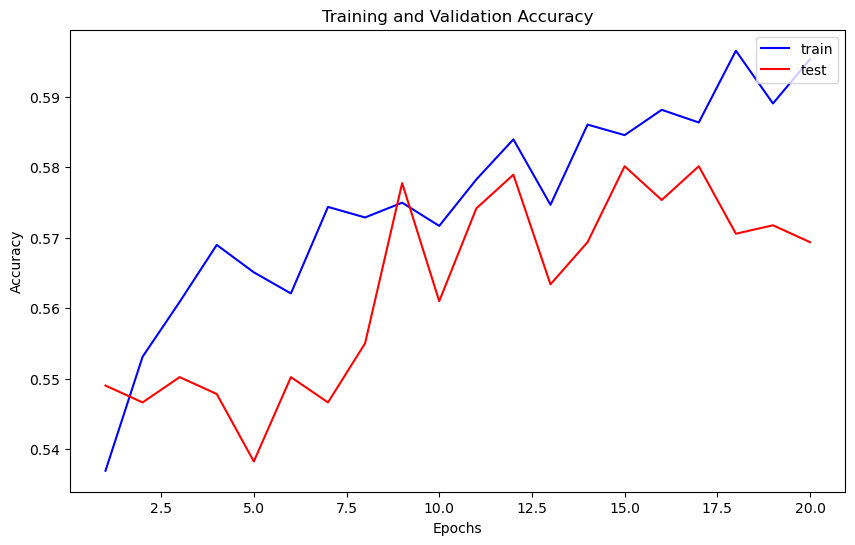

In [81]:
# 정확도 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [83]:
def create_dense_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='tanh', input_shape=input_shape))
    model.add(Dense(32, activation='tanh'))
    #model.add(Dense(1, activation='sigmoid'))  # 이진 분류일 경우

    #model.add(Dense(3, activation='softmax'))  # 다중 분류일 경우

    model.add(Dense(1))  # 회귀일 경우

    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # 다중 분류일 경우(target을 원 핫 인코딩 한 경우)
    #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 다중 분류일 경우(target을 라벨 인코딩 한 경우)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])  # 회귀일 경우
    return model

# 분류
input_dim = x_train_rg.shape[1]
model_rg = create_dense_model((input_dim,))
model_rg.summary()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history2 = model_rg.fit(x_train_rg,y_train_rg,epochs=20,batch_size=16,validation_data=(x_test_rg,y_test_rg))

Epoch 1/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 79.9746 - mean_squared_error: 79.9746 - val_loss: 6.4745 - val_mean_squared_error: 6.4745
Epoch 2/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7973 - mean_squared_error: 5.7973 - val_loss: 5.6220 - val_mean_squared_error: 5.6220
Epoch 3/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7178 - mean_squared_error: 5.7178 - val_loss: 5.1717 - val_mean_squared_error: 5.1717
Epoch 4/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4560 - mean_squared_error: 5.4560 - val_loss: 5.0647 - val_mean_squared_error: 5.0647
Epoch 5/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8930 - mean_squared_error: 4.8930 - val_loss: 4.9087 - val_mean_squared_error: 4.9087
Epoch 6/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9171 - mean_squared_error: 4.9171 - val_loss: 4.7714 - val_mean_squared_error: 4.7714
Epoch 7/20
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9064 - mean_squared_error: 4.9064 - val_loss: 4.

Text(0, 0.5, 'Loss')

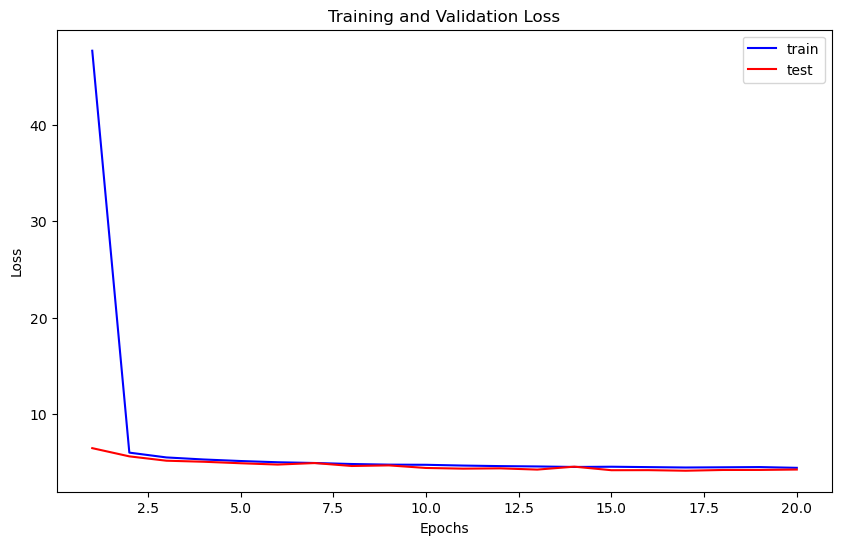

In [86]:
# 손실 시각화
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [89]:
history2.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

Text(0, 0.5, 'Accuracy')

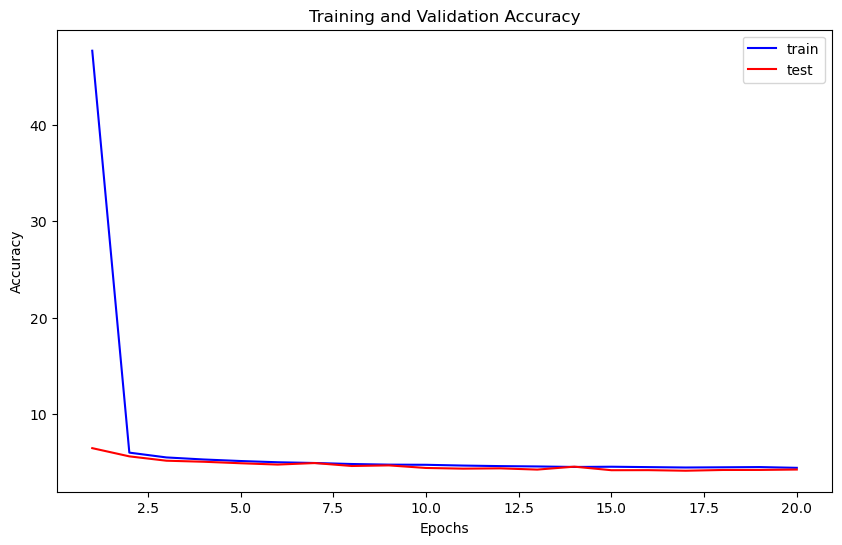

In [91]:
# 정확도 시각화
acc = history2.history['mean_squared_error']
val_acc = history2.history['val_mean_squared_error']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')